In [4]:
%cd "/content/drive/MyDrive/Desktop/PythonP/week1/application"

/content/drive/MyDrive/Desktop/PythonP/week1/application


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# import all the packages
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *
from test_utils import summary, comparator

%matplotlib inline
np.random.seed(1)

Load the data set and split the data set into training set and testing set

In [6]:
x_train , y_train , x_test , y_test , classes = load_happy_dataset()
#normalizing images by dividing by 255
x_train = x_train/255
x_test = x_test/255
#reshape the labels so that we can classify
y_train = y_train.T
y_test = y_test.T

#printing the shapes
print("Number of training exmaples:" , str(x_train.shape[0]))
print("Number of testing examples:" , str(x_test.shape[0]))
print("X_train shape:" , str(x_train.shape))
print("X_test shape" , str(x_test.shape))
print("training labels shape:" , str(y_train.shape))
print("testing labels shape:" , str(y_test.shape))

Number of training exmaples: 600
Number of testing examples: 150
X_train shape: (600, 64, 64, 3)
X_test shape (150, 64, 64, 3)
training labels shape: (600, 1)
testing labels shape: (150, 1)


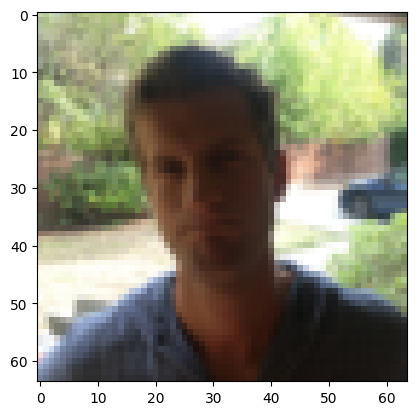

In [7]:
index = 10
plt.imshow(x_train[index])
plt.show()

For the first part of this assignment, you'll create a model using TF Keras' Sequential API, which allows you to build layer by layer, and is ideal for building models where each layer has exactly one input tensor and one output tensor.

As you'll see, using the Sequential API is simple and straightforward, but is only appropriate for simpler, more straightforward tasks. Later in this notebook you'll spend some time building with a more flexible, powerful alternative: the Functional API.

In [8]:
# building of a happy model
def happy_model():
  model = tf.keras.Sequential([
      tf.keras.Input(shape=(64,64,3)),
      tfl.ZeroPadding2D(padding=3),
      tfl.Conv2D(filters=32,kernel_size=7,strides=1),
      tfl.BatchNormalization(axis=3, momentum=0.99, epsilon=0.001),
      tfl.ReLU(),
      tfl.MaxPool2D(),
      tfl.Flatten(),
      tfl.Dense(1,activation="sigmoid")
  ])
  return model

In [9]:
happy_model = happy_model()
# Print a summary for each layer
for layer in summary(happy_model):
    print(layer)

output = [['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))],
            ['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform'],
            ['BatchNormalization', (None, 64, 64, 32), 128],
            ['ReLU', (None, 64, 64, 32), 0],
            ['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid'],
            ['Flatten', (None, 32768), 0],
            ['Dense', (None, 1), 32769, 'sigmoid']]

comparator(summary(happy_model), output)

['ZeroPadding2D', (None, 70, 70, 3), 0, ((3, 3), (3, 3))]
['Conv2D', (None, 64, 64, 32), 4736, 'valid', 'linear', 'GlorotUniform']
['BatchNormalization', (None, 64, 64, 32), 128]
['ReLU', (None, 64, 64, 32), 0]
['MaxPooling2D', (None, 32, 32, 32), 0, (2, 2), (2, 2), 'valid']
['Flatten', (None, 32768), 0]
['Dense', (None, 1), 32769, 'sigmoid']
All tests passed!


In [10]:
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [11]:
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPaddin  (None, 70, 70, 3)         0         
 g2D)                                                            
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 32)        128       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                        

Trainging and evaluating model

In [12]:
happy_model.fit(x_train, y_train, epochs=10, batch_size=30)

Epoch 1/10
20/20 [==============================] - 6s 271ms/step - loss: 2.9560 - accuracy: 0.5333
Epoch 2/10
20/20 [==============================] - 4s 171ms/step - loss: 0.4602 - accuracy: 0.8350
Epoch 3/10
20/20 [==============================] - 3s 158ms/step - loss: 0.1938 - accuracy: 0.9167
Epoch 4/10
20/20 [==============================] - 3s 161ms/step - loss: 0.1796 - accuracy: 0.9383
Epoch 5/10
20/20 [==============================] - 5s 236ms/step - loss: 0.2280 - accuracy: 0.8933
Epoch 6/10
20/20 [==============================] - 4s 212ms/step - loss: 0.1047 - accuracy: 0.9617
Epoch 7/10
20/20 [==============================] - 3s 158ms/step - loss: 0.0920 - accuracy: 0.9700
Epoch 8/10
20/20 [==============================] - 3s 159ms/step - loss: 0.0687 - accuracy: 0.9833
Epoch 9/10
20/20 [==============================] - 4s 212ms/step - loss: 0.0642 - accuracy: 0.9833
Epoch 10/10
20/20 [==============================] - 4s 223ms/step - loss: 0.0577 - accuracy: 0.9883

lets test it by passing testing data

In [13]:
happy_model.evaluate(x_test , y_test)

5/5 [==============================] - 0s 75ms/step - loss: 0.2738 - accuracy: 0.8933


[0.2738315165042877, 0.8933333158493042]

The Functional API
Welcome to the second half of the assignment, where you'll use Keras' flexible Functional API to build a ConvNet that can differentiate between 6 sign language digits.

The Functional API can handle models with non-linear topology, shared layers, as well as layers with multiple inputs or outputs. Imagine that, where the Sequential API requires the model to move in a linear fashion through its layers, the Functional API allows much more flexibility. Where Sequential is a straight line, a Functional model is a graph, where the nodes of the layers can connect in many more ways than one.

In the visual example below, the one possible direction of the movement Sequential model is shown in contrast to a skip connection, which is just one of the many ways a Functional model can be constructed. A skip connection, as you might have guessed, skips some layer in the network and feeds the output to a later layer in the network. Don't worry, you'll be spending more time with skip connections very soon!

Lets load the sign data set now

In [14]:
# Loading the data (signs)
x_train,y_train, x_test, y_test, classes = load_signs_dataset()

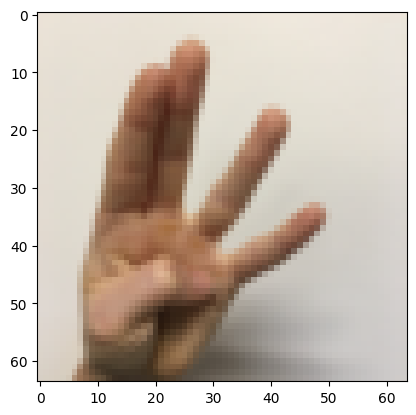

y = 4


In [15]:
# Example of an image from the dataset
index = 9
plt.imshow(x_train[index])
plt.show()
print ("y = " + str(np.squeeze(y_train[:, index])))

In [16]:
x_train = x_train/255.
x_test = x_test/255.
y_train = convert_to_one_hot(y_train, 6).T
y_test = convert_to_one_hot(y_test, 6).T
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


In [17]:
#forward propagation
def convolutional_model(input_shape):
  input_img = tf.keras.Input(shape=input_shape)
  Z1 = tfl.Conv2D(filters= 8. , kernel_size=4 , padding='same',strides=1)(input_img)
  A1 = tfl.ReLU()(Z1)
  P1 = tf.keras.layers.MaxPool2D(pool_size=8, strides=8, padding='SAME')(A1)
  Z2 = tfl.Conv2D(filters= 16. , kernel_size=2 , padding='same',strides=1)(P1)
  A2 = tfl.ReLU()(Z2)
  P2 = tf.keras.layers.MaxPool2D(pool_size=4, strides=4, padding='SAME')(A2)
  f = tfl.Flatten()(P2)
  outputs = tfl.Dense(units= 6 , activation='softmax')(f)
  model = tf.keras.Model(inputs=input_img, outputs=outputs)
  return model


In [18]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()
output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 6), 390, 'softmax']]

comparator(summary(conv_model), output)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

In [28]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(90)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(90)
history = conv_model.fit(x_train, y_train, epochs=150, batch_size=90)
# save weights for the use in later predictions
conv_model.save_weights('your_model_weights.h5')

Epoch 1/150
12/12 [==============================] - 1s 114ms/step - loss: 0.3457 - accuracy: 0.8880
Epoch 2/150
12/12 [==============================] - 1s 113ms/step - loss: 0.3527 - accuracy: 0.8787
Epoch 3/150
12/12 [==============================] - 1s 111ms/step - loss: 0.3457 - accuracy: 0.8917
Epoch 4/150
12/12 [==============================] - 1s 110ms/step - loss: 0.3511 - accuracy: 0.8806
Epoch 5/150
12/12 [==============================] - 2s 134ms/step - loss: 0.3439 - accuracy: 0.8917
Epoch 6/150
12/12 [==============================] - 2s 191ms/step - loss: 0.3558 - accuracy: 0.8843
Epoch 7/150
12/12 [==============================] - 2s 194ms/step - loss: 0.3453 - accuracy: 0.8861
Epoch 8/150
12/12 [==============================] - 2s 173ms/step - loss: 0.3492 - accuracy: 0.8852
Epoch 9/150
12/12 [==============================] - 1s 112ms/step - loss: 0.3419 - accuracy: 0.8870
Epoch 10/150
12/12 [==============================] - 1s 111ms/step - loss: 0.3457 - accura

In [29]:
conv_model.evaluate(x_test , y_test)

4/4 [==============================] - 0s 16ms/step - loss: 0.3561 - accuracy: 0.8583


[0.3560729920864105, 0.8583333492279053]

In [30]:
history.history

{'loss': [0.34573933482170105,
  0.3526679575443268,
  0.34567713737487793,
  0.3511321246623993,
  0.34390830993652344,
  0.355825811624527,
  0.34529241919517517,
  0.34920963644981384,
  0.34192270040512085,
  0.3456881642341614,
  0.3512393832206726,
  0.34189796447753906,
  0.3416447639465332,
  0.33541542291641235,
  0.32578045129776,
  0.3217991590499878,
  0.3207186460494995,
  0.3196818232536316,
  0.3202129006385803,
  0.3161254823207855,
  0.31458115577697754,
  0.31420233845710754,
  0.31535595655441284,
  0.309545636177063,
  0.30830883979797363,
  0.30768340826034546,
  0.31159430742263794,
  0.3074808120727539,
  0.3090164363384247,
  0.3104877471923828,
  0.30433300137519836,
  0.3045250475406647,
  0.299239844083786,
  0.2932471036911011,
  0.2943098843097687,
  0.29262009263038635,
  0.2871650159358978,
  0.28511348366737366,
  0.28763824701309204,
  0.28807130455970764,
  0.28841331601142883,
  0.2794772982597351,
  0.2972496747970581,
  0.2830459475517273,
  0.27974

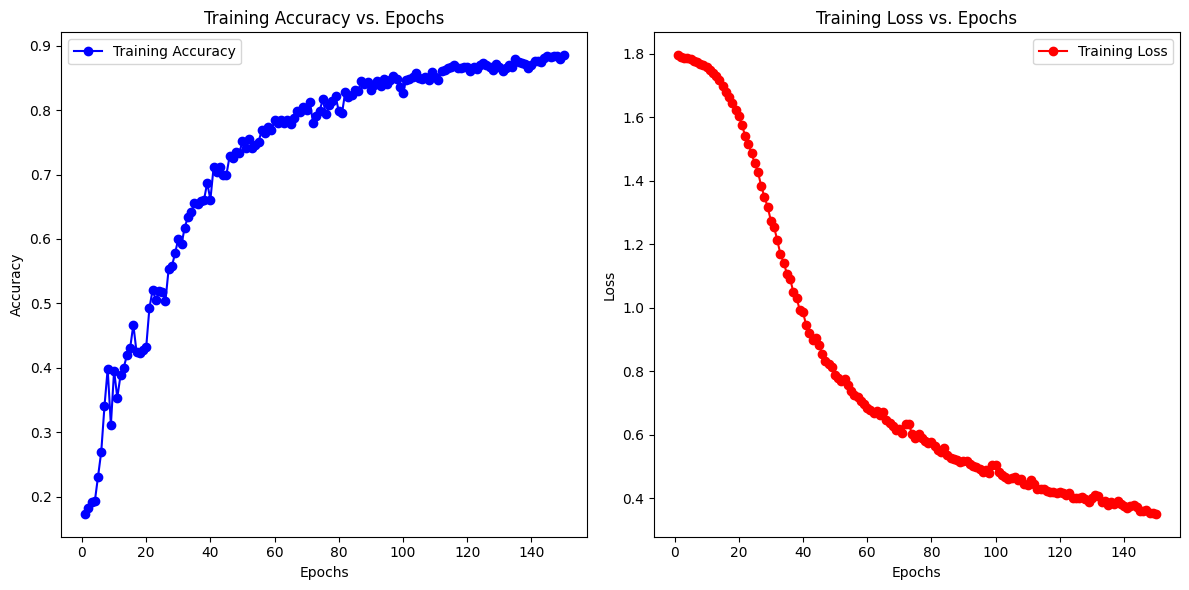

In [23]:
import matplotlib.pyplot as plt

# Assuming history is your History object returned by model.fit
epochs = range(1, len(history.history['accuracy']) + 1)
accuracy = history.history['accuracy']
loss = history.history['loss']

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro-', label='Training Loss')
plt.title('Training Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


As from the two plots it can be seen that the accuracy (blue plot) increases with the increase in epoch and loss (red plot) decreases with an increase in epoch .
It works successfully.

In [79]:
# Initialize counter
correct_predictions = 0

# Assuming x_train contains your dataset
for index in range(len(x_test)):
    image = x_train[index]
    actual_class = y_test[index]  # Use index directly for the label

    # Reshape the image to match the input shape expected by the model
    image = np.reshape(image, (1, *image.shape))

    # Make predictions
    predictions = conv_model.predict(image)

    # Get the predicted class
    predicted_class = np.argmax(predictions)

    # Get the index where the value is 1 in the actual_class array
    actual_index = np.where(actual_class == 1)[0][0]

    # Check if the predicted class is equal to the actual class
    if predicted_class == actual_index:
        correct_predictions += 1

    # Display the image if needed

# Print the total number of correct predictions
print(f'Total correct predictions: {correct_predictions}')


1/1 [==============================] - 0s 38ms/step
Total correct predictions: 22
